# Problem Statement

##### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

##### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

##### BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


# Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bikes= pd.read_csv('day.csv')

In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### No null values present in dataset .

In [6]:
bikes[['dteday', 'mnth','yr','weekday']]

,dteday,mnth,yr,weekday
0,01-01-2018,1,0,1
1,02-01-2018,1,0,2
2,03-01-2018,1,0,3
3,04-01-2018,1,0,4
4,05-01-2018,1,0,5
...,...,...,...,...
725,27-12-2019,12,1,5
726,28-12-2019,12,1,6
727,29-12-2019,12,1,0
728,30-12-2019,12,1,1


In [7]:
# 'Instant' is only teh index so let'smake it index and remove default one
bikes.set_index('instant', inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#####  'mnth', 'yr', 'weekday' are teh derived columns from dteday --hence in the modeling we won't be needing dteday column 

In [8]:
bikes.drop(columns= ['dteday'], inplace=True)

In [9]:
bikes[['temp','atemp']]

,temp,atemp
instant,,
1,14.110847,18.18125
2,14.902598,17.68695
3,8.050924,9.47025
4,8.200000,10.60610
5,9.305237,11.46350
...,...,...
726,10.420847,11.33210
727,10.386653,12.75230
728,10.386653,12.12000


##### temp' and 'atemp' columns can be seen related as  the felt temperature will be relative to the temp. Will confirm this via graphs, if related will taking only one of these for model building

# Data Visualisation 

In [10]:
bikes[['temp','atemp']]

,temp,atemp
instant,,
1,14.110847,18.18125
2,14.902598,17.68695
3,8.050924,9.47025
4,8.200000,10.60610
5,9.305237,11.46350
...,...,...
726,10.420847,11.33210
727,10.386653,12.75230
728,10.386653,12.12000


##### 1. we can clearly see 'temp' and 'atemp' are almost similar and also ave exactly same linear colreation with the target variable- 'cnt'. Hence we will drop one of it.

In [11]:
# Dropping atemp 
bikes.drop(columns= ['atemp'],inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [12]:
## Renaming Columns for better understanding
bikes.rename(columns= {'yr':'year', 'mnth': 'month', 'weathersit':'weatherStatus', 'weekday':'weekDay', 'workingday':'workingDay', 'hum':'humidity','windspeed':'windSpeed', 'cnt':'count'}, inplace=True)
bikes.head()

,season,year,month,holiday,weekDay,workingDay,weatherStatus,temp,humidity,windSpeed,casual,registered,count
instant,,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [13]:
## Backup Dataset
edaBikes= bikes.copy()

##### In the dataset we have
Categorical Columns- Season, mnth,weekday, weathersit -- we will be mapping these to actual categories
Binary Columns as 0 and 1- yr, holiday,wokrinday--we will be mapping these to actual categories.


In [14]:
## Binary Columns Mapping
bikes['year']= bikes['year'].apply(lambda x: '2018' if x==0 else '2019')
bikes['year'].value_counts()

# edaBikes['holiday']= edaBikes['holiday'].apply(lambda x: 'No' if x==0 else 'Yes')
# edaBikes['holiday'].value_counts()

# edaBikes['workingDay']= edaBikes['workingDay'].apply(lambda x: 'No' if x==0 else 'Yes')
# edaBikes['workingDay'].value_counts()

2019    365
2018    365
Name: year, dtype: int64

In [15]:
## Categorical Columns mapping

## SEASON MAPPING
def mappedSeason (x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    

bikes['season']= bikes['season'].apply(mappedSeason)
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
## MONTH MAPPING
d= {1:'Jan',
2:'Feb',
3: 'Mar',
4:'Apr',
5:'May',
6:'Jun',
7:'Jul',
8:'Aug',
9:'Sep',
10:'Oct',
11:'Nov',
12:'Dec'
}

bikes['month']= [d[i] for i in  bikes['month']]
bikes['month'].value_counts()

Oct    62
Jan    62
Jul    62
Mar    62
Aug    62
Dec    62
May    62
Jun    60
Sep    60
Nov    60
Apr    60
Feb    56
Name: month, dtype: int64

In [17]:
## WEATHEr MAPPING
def mappedWeather (x):
    if x==1:
        return 'clear'
    elif x==2:
        return 'Mist/Cloudy'
    elif x==3:
        return 'Light Rain/Snow'
    else: 
        return 'Heavy Rain/Snow'
    

bikes['weatherStatus']= bikes['weatherStatus'].apply(mappedWeather)
bikes['weatherStatus'].value_counts()

clear              463
Mist/Cloudy        246
Light Rain/Snow     21
Name: weatherStatus, dtype: int64

In [18]:
## WEEKDAY MAPPING
dw= {0:'Sun', 1:'Mon', 2: 'Tue', 3: 'Wed', 4:'Thu', 5:'Fri',6:'Sat'}
bikes['weekDay']= [dw[i] for i in bikes['weekDay']]
bikes['weekDay'].value_counts()

Tue    105
Mon    105
Thu    104
Fri    104
Sun    104
Wed    104
Sat    104
Name: weekDay, dtype: int64

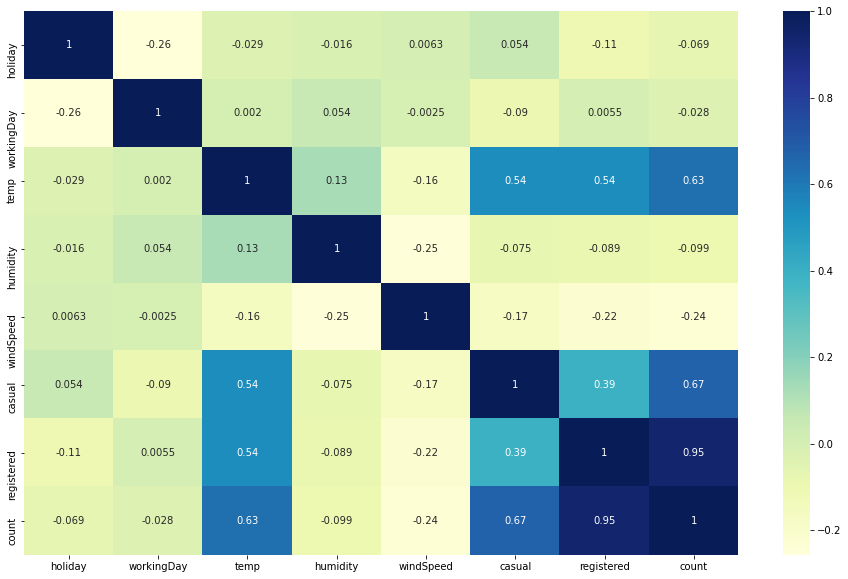

In [19]:
plt.figure(figsize= (16,10))
sn.heatmap(bikes.corr(), cmap= 'YlGnBu',annot=True)
plt.show()


##### 1. Year, temperature , casual rental and registered rental have fairly high correlation with the number of bikes rented.

#####  2.Month, holidays, weekday, workingday, weathersit do not have individual high correlations with target variable but we can check if they can contribute by clubbing some of these.

##### 3. Only Temp ispositively correlated to the Count variable  

In [20]:
## Dropping Casual and Registered columns as they are a part of total count of rentals. 
## Taking Count as taregt variable would define casual and registered counts as well.
bikes.drop(columns= ['casual','registered'], inplace=True)

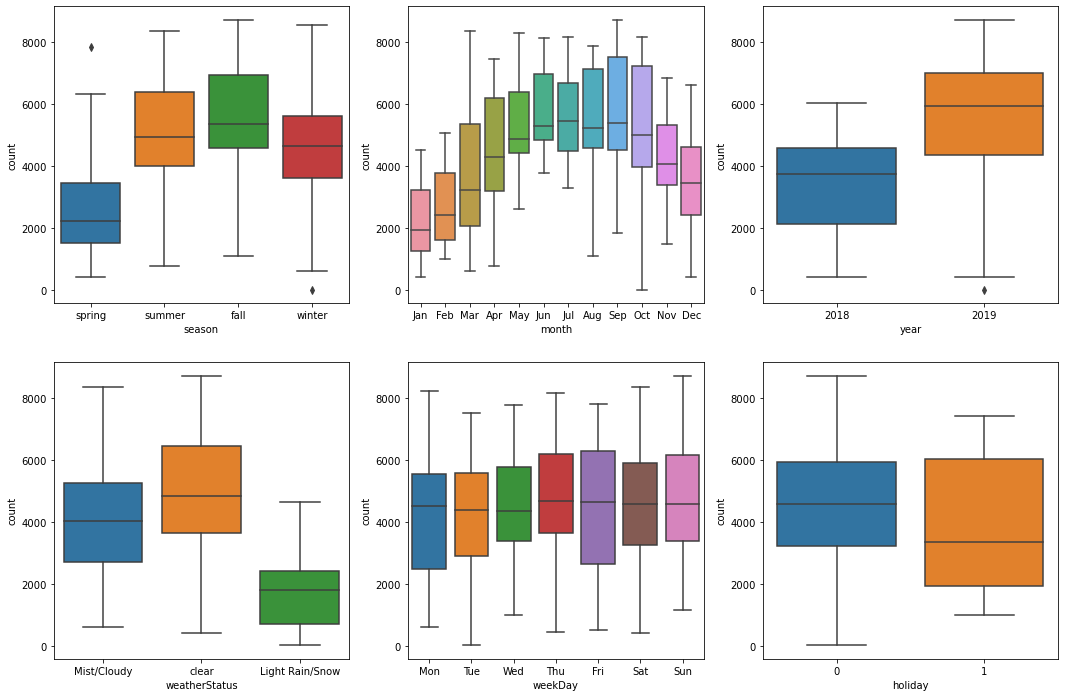

In [21]:
## Categorical Data Relationships 
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sn.boxplot(x= 'season', y= 'count', data= bikes)
plt.subplot(2,3,2)
sn.boxplot(x= 'month', y= 'count', data= bikes)
plt.subplot(2,3,3)
sn.boxplot(x= 'year', y= 'count', data= bikes)
plt.subplot(2,3,4)
sn.boxplot(x= 'weatherStatus', y= 'count', data= bikes)
plt.subplot(2,3,5)
sn.boxplot(x= 'weekDay', y= 'count', data= bikes)
plt.subplot(2,3,6)
sn.boxplot(x= 'holiday', y= 'count', data= bikes)

plt.show()

##### INFERENCES

1. Summer and Fall have the highest counts for bike rentals. In Summer -June and August ave higher rental rate. while in Fall- Septemer and October contribute to higher distribution as well as highest number of rentals among all 12 months. In winters only december is contributing for higher bike rentals than Spring season (March, April,May)

2. 2019 is a higher contributing year for the number of bike rentals.

3. Type of Weather is also contributing for the increased/decreased rentals- on days of Clear weather we ahve more bike rentals, while in 'Light Rain/Snow' and 'heavy rain/snow' we have least and 0  rentals respectively.

4. WeekDay is not having much differnce in the rentals

5. Holidays shows a intersting trend - wherein if there isn't a holiday people are renting more--that may e used for going/coming to workplacs. Data shows some peaks over 6000 gor 75-100 percentile region. Although data shouws more mass distribution for holidays for aove 50percentile ranging from 3000- 6000. This is definitely contributing to the number of rentals.


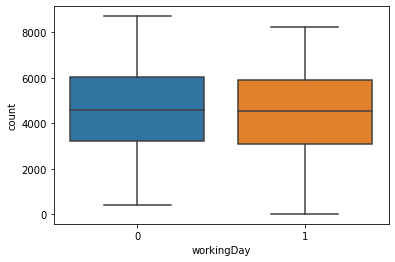

In [22]:
sn.boxplot(data= bikes, x= 'workingDay', y = 'count')
plt.show()

## No comparable changes if it's a working day or not. 

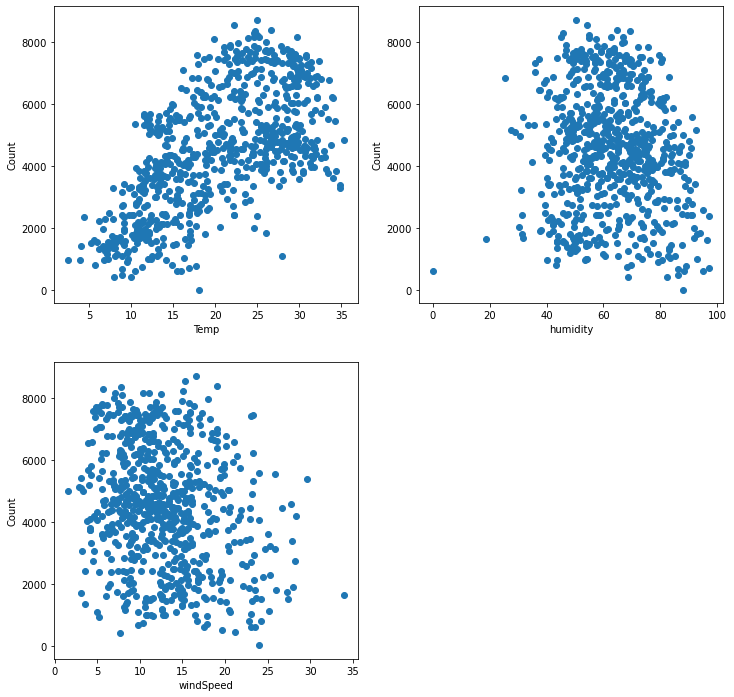

In [23]:
## Numerical Data Inter-relationships
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.scatter(data= bikes, x= 'temp', y='count')
plt.xlabel('Temp')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.scatter(data= bikes, x= 'humidity', y='count')
plt.xlabel('humidity')
plt.ylabel('Count')

plt.subplot(2,2,3)
plt.scatter(data= bikes, x= 'windSpeed', y='count')
plt.xlabel('windSpeed')
plt.ylabel('Count')

plt.show()

# Data Preparation

##### Creating Dummy Variables for categorical Coluumns

In [24]:
bikes.head()

,season,year,month,holiday,weekDay,workingDay,weatherStatus,temp,humidity,windSpeed,count
instant,,,,,,,,,,,
1,spring,2018,Jan,0,Mon,1,Mist/Cloudy,14.110847,80.5833,10.749882,985
2,spring,2018,Jan,0,Tue,1,Mist/Cloudy,14.902598,69.6087,16.652113,801
3,spring,2018,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
4,spring,2018,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,1562
5,spring,2018,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


In [25]:
yeardu= pd.get_dummies(bikes['year'],drop_first=True, prefix='year')
monthdu= pd.get_dummies(bikes['month'],drop_first=True, prefix='month')
seasondu= pd.get_dummies(bikes['season'],drop_first=True,prefix='season')
weatherStatusdu= pd.get_dummies(bikes['weatherStatus'],drop_first=True, prefix='weather')
weekDaydu= pd.get_dummies(bikes['weekDay'],drop_first=True,prefix= 'week')

In [26]:
bikes= pd.concat([bikes,seasondu, yeardu, monthdu, weatherStatusdu, weekDaydu], axis= 1)

In [27]:
bikes.shape
bikes.head()

,season,year,month,holiday,weekDay,workingDay,weatherStatus,temp,humidity,windSpeed,...,month_Oct,month_Sep,weather_Mist/Cloudy,weather_clear,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,2018,Jan,0,Mon,1,Mist/Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
2,spring,2018,Jan,0,Tue,1,Mist/Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,1,0
3,spring,2018,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,1
4,spring,2018,Jan,0,Thu,1,clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
5,spring,2018,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0


In [28]:
## BackupDataset
edaBikes= bikes.copy()

In [29]:
## We'll remove parent columns for dummy variables.

bikes.drop(columns= ['season','month', 'year', 'weatherStatus', 'weekDay'], inplace=True)

In [30]:
bikes.shape

(730, 29)

# Modelling

In [31]:
bikes_tran, bikes_test= train_test_split(bikes,train_size=0.75, random_state= 200)

In [32]:
bikes_tran.shape

(547, 29)

In [33]:
bikes_test.shape

(183, 29)

In [34]:
bikes_tran.head()

,holiday,workingDay,temp,humidity,windSpeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weather_Mist/Cloudy,weather_clear,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
instant,,,,,,,,,,,,,,,,,,,,,
76,0,0,17.015000,60.2917,14.041793,2744,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
700,0,0,12.231653,80.6667,4.000181,5191,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
182,0,0,29.622500,39.6250,6.874736,5362,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
277,0,1,19.850847,71.0000,13.792218,4456,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
353,0,1,11.343347,63.7500,11.584032,3403,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [35]:
## Scaling the dataset

Scaler= StandardScaler()
bikes_tran[['temp', 'humidity', 'windSpeed', 'count']]= Scaler.fit_transform(bikes_tran[['temp', 'humidity', 'windSpeed','count']])
bikes_tran.describe()

,holiday,workingDay,temp,humidity,windSpeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weather_Mist/Cloudy,weather_clear,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
count,547.000000,547.000000,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000
mean,0.032907,0.689214,1.120371e-16,7.069299e-16,-1.215765e-16,1.514125e-16,0.250457,0.259598,0.244973,0.493601,...,0.085923,0.073126,0.334552,0.641682,0.153565,0.135283,0.148080,0.13894,0.137112,0.151737
std,0.178556,0.463239,1.000915e+00,1.000915e+00,1.000915e+00,1.000915e+00,0.433673,0.438815,0.430465,0.500417,...,0.280507,0.260582,0.472266,0.479945,0.360861,0.342339,0.355505,0.34620,0.344280,0.359094
min,0.000000,0.000000,-2.400289e+00,-4.420927e+00,-2.142910e+00,-2.104412e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,-8.613020e-01,-7.276680e-01,-7.226757e-01,-7.044755e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,8.447185e-03,-5.842450e-03,-1.161121e-01,6.882849e-03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,1.000000,8.920358e-01,7.280529e-01,5.333079e-01,7.262660e-01,0.500000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.914046e+00,2.388828e+00,3.960553e+00,2.183929e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
y_train= bikes_tran[['count']]
bikes_tran.pop('count')
X_train= bikes_tran.copy()

#### RFE for Feature Selection

In [37]:
lm= LinearRegression()
lm.fit(X_train,y_train)
np.random.seed(0)
features= RFE(lm,20)
features= features.fit(X_train,y_train)
l= list(zip(X_train.columns,features.support_, features.ranking_))
l

[('holiday', True, 1),
 ('workingDay', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windSpeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 8),
 ('month_Mar', False, 9),
 ('month_May', True, 1),
 ('month_Nov', True, 1),
 ('month_Oct', True, 1),
 ('month_Sep', True, 1),
 ('weather_Mist/Cloudy', True, 1),
 ('weather_clear', True, 1),
 ('week_Mon', False, 4),
 ('week_Sat', False, 2),
 ('week_Sun', False, 3),
 ('week_Thu', True, 1),
 ('week_Tue', False, 5),
 ('week_Wed', False, 6)]

## Model 1 -  with all the featurers obtained via RFE

In [38]:
cols= X_train.columns[features.support_]
X_train_1= X_train[cols]
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.32e-205
Time:                        15:13:14   Log-Likelihood:                -249.66
No. Observations:                 547   AIC:                             541.3
Df Residuals:                     526   BIC:                             631.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2218    

#### Model Shows pretty good R-Squared value for the 1st model. Out of all the columns- month_May and month_Oct show pretty high values for p-value making tem both insgnificant. Although let's confirm for multicollinearity with respect to VIF values.

In [39]:
vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif


,features,VIF
0,holiday,1.15
1,workingDay,3.68
2,temp,4.41
3,humidity,1.90
4,windSpeed,1.22
5,season_spring,7.50
6,season_summer,4.26
7,season_winter,9.77
8,year_2019,2.08
9,month_Dec,3.35


#### Looking at the VIF's we can see there is multicollinearity present between the selected fetaures. We will fisrt drop teh columns having high p- values and if still columns appear as multicollinear then we drop them.

## Model 2 - DELETING MONTH_OCT

In [40]:
temp =X_train_1.copy()

In [41]:
# We will be dropping 2018 as 2019 has more strong relationship , and can be deducted with it.
X_train_1.drop(columns=['month_Oct'],inplace=True)

In [42]:
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.50e-206
Time:                        15:13:43   Log-Likelihood:                -249.95
No. Observations:                 547   AIC:                             539.9
Df Residuals:                     527   BIC:                             626.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2319    

,features,VIF
0,holiday,1.15
1,workingDay,3.68
2,temp,4.36
3,humidity,1.87
4,windSpeed,1.22
5,season_spring,7.41
6,season_summer,4.15
7,season_winter,4.51
8,year_2019,2.07
9,month_Dec,1.80


#### As month_Oct was insignificant to the model, dropping it didn't change the value of our R-Squared.

## Model 3 - DELETING MONTH_MAY

In [43]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_May'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.02e-206
Time:                        15:13:50   Log-Likelihood:                -250.72
No. Observations:                 547   AIC:                             539.4
Df Residuals:                     528   BIC:                             621.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2474    

,features,VIF
0,holiday,1.15
1,workingDay,3.67
2,temp,4.25
3,humidity,1.83
4,windSpeed,1.21
5,season_spring,7.35
6,season_summer,3.49
7,season_winter,4.50
8,year_2019,2.07
9,month_Dec,1.79


#### As month_May was insignificant to the model, dropping it didn't change the value of our R-Squared. Month of july still seems to be insignificant , will be dropping it in next model

## Model 4 DELETING - MONTH_JULY

In [44]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_Jul'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.46e-207
Time:                        15:14:11   Log-Likelihood:                -252.31
No. Observations:                 547   AIC:                             540.6
Df Residuals:                     529   BIC:                             618.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2943    

,features,VIF
0,holiday,1.14
1,workingDay,3.66
2,temp,4.10
3,humidity,1.83
4,windSpeed,1.21
5,season_spring,7.11
6,season_summer,3.01
7,season_winter,4.25
8,year_2019,2.07
9,month_Dec,1.79


#### As month_July was insignificant to the model, dropping it didn't change the value of our R-Squared. Month of feb still seems to be insignificant compared to other features , will be dropping it in next model. Priority to the features having comparatively high p value is given for droppin the features, as VIF will be changed in every model. Once model has all significant features, we will look in for VIF's  

## Model 5 - DELETING MONTH FEB

In [45]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_Feb'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.89e-207
Time:                        15:14:23   Log-Likelihood:                -254.43
No. Observations:                 547   AIC:                             542.9
Df Residuals:                     530   BIC:                             616.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3069    

,features,VIF
0,holiday,1.14
1,workingDay,3.66
2,temp,3.91
3,humidity,1.82
4,windSpeed,1.21
5,season_spring,6.23
6,season_summer,2.97
7,season_winter,4.25
8,year_2019,2.07
9,month_Dec,1.60


#### As month_Feb was insignificant to the model, dropping it didn't change the value of our R-Squared a lot. Month of Jan still seems to be insignificant compared to other features , will be dropping it in next model. Priority to the features having comparatively high p value is given for droppin the features, as VIF will be changed in every model. Once model has all significant features, we will look in for VIF's  

## MODEL 6- DELETING MONTH JAN

In [46]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_Jan'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.72e-208
Time:                        15:14:28   Log-Likelihood:                -256.13
No. Observations:                 547   AIC:                             544.3
Df Residuals:                     531   BIC:                             613.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3212    

,features,VIF
0,holiday,1.14
1,workingDay,3.66
2,temp,3.58
3,humidity,1.81
4,windSpeed,1.21
5,season_spring,6.16
6,season_summer,2.92
7,season_winter,4.20
8,year_2019,2.07
9,month_Dec,1.50


#### As month_Jan was insignificant to the model, dropping it didn't change the value of our R-Squared a lot. Weekday-Thu  still seems to be insignificant compared to other features , will be dropping it in next model. Priority to the features having comparatively high p value is given for droppin the features, as VIF will be changed in every model. Once model has all significant features, we will look in for VIF's  

## Model 7 - DELETING WEEK_THU

In [47]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['week_Thu'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.02e-207
Time:                        15:14:37   Log-Likelihood:                -259.35
No. Observations:                 547   AIC:                             548.7
Df Residuals:                     532   BIC:                             613.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3075    

,features,VIF
0,holiday,1.14
1,workingDay,3.40
2,temp,3.57
3,humidity,1.81
4,windSpeed,1.21
5,season_spring,6.16
6,season_summer,2.91
7,season_winter,4.20
8,year_2019,2.07
9,month_Dec,1.50


#### As week_Thu was insignificant to the model, dropping it didn't change the value of our R-Squared a lot. workingday feature seems to have lowest impact (lowest coeffecient) compared to other features , will be dropping it in next model.

## MODEL 8 - DELETING WORKINGDAY

In [48]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['workingDay'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.51e-207
Time:                        15:14:40   Log-Likelihood:                -264.08
No. Observations:                 547   AIC:                             556.2
Df Residuals:                     533   BIC:                             616.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3967    

,features,VIF
0,holiday,1.05
1,temp,3.57
2,humidity,1.76
3,windSpeed,1.20
4,season_spring,6.13
5,season_summer,2.90
6,season_winter,4.18
7,year_2019,2.06
8,month_Dec,1.50
9,month_Nov,1.86


#### Dropping WorkingDay features didn't impacted R-Sqaured value a lot. Hence proving the decision fruitful. Dropping months like Dec and Nov as they would be covered in the respective seasons- winter, spring, summers. Thus dropping those months should reduce multicollinearity between features.

## MODEL 9 DELETING MONTH DEC

In [49]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_Dec'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.74e-206
Time:                        15:14:42   Log-Likelihood:                -269.60
No. Observations:                 547   AIC:                             565.2
Df Residuals:                     534   BIC:                             621.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4281    

,features,VIF
0,holiday,1.05
1,temp,3.35
2,humidity,1.74
3,windSpeed,1.20
4,season_spring,6.05
5,season_summer,2.85
6,season_winter,4.05
7,year_2019,2.06
8,month_Nov,1.63
9,month_Sep,1.25


## MODEL 10- DELETING MONTH NOV

In [50]:
temp= X_train_1.copy()
#X_train_1= temp.copy()

# We will be dropping workingDay 
X_train_1.drop(columns=['month_Nov'],inplace=True)

# Model
X_train_1_c= sm.add_constant(X_train_1)
lrm= sm.OLS(y_train, X_train_1_c).fit()
print(lrm.summary())

vif= pd.DataFrame()
vif['features']= X_train_1.columns
vif['VIF']= [variance_inflation_factor(X_train_1.values,i) for i in range( X_train_1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     256.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.41e-205
Time:                        15:14:44   Log-Likelihood:                -273.88
No. Observations:                 547   AIC:                             571.8
Df Residuals:                     535   BIC:                             623.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4472    

,features,VIF
0,holiday,1.04
1,temp,3.24
2,humidity,1.74
3,windSpeed,1.19
4,season_spring,5.88
5,season_summer,2.81
6,season_winter,3.81
7,year_2019,2.06
8,month_Sep,1.23
9,weather_Mist/Cloudy,3.78


#### This looks pretty good model wherein none of the features are coming as insignificant .Also model is defining 84% approx of the variance that seems quiet perfect. 

#### Although features like clear Weather and Spring Season are showing a bit high multicollinearity, but  both the features seems significant accrding to the pvalues, hence decided to keep them in the model. 

#### Compared this model by comparing AIC and BIC values with the model created by MinMaxScaling instead of StandardScaling. After some iterations of model creation - AIC/BIC values are reaching to the same levels we have in Model 10. Hence choosing Model 10 of StandardScaled data. 

### FINAL MODEL:

R-Squared= 0.841
Adj.R-Squared= 0.837
F-Statistics= 256.5
Prob(F-Statistics)~0.00

#### Looking at the F-Statistics probability as 0, we can confirm that the final model we chose is reliable for our predictions. 

## RESIDUAL ANALYSIS of TRAIN DATA

In [51]:
bikes_tran, bikes_test= train_test_split(bikes,train_size=0.75, random_state= 200)

In [52]:
y_train_predicted= lrm.predict(X_train_1_c)

# To make y_train and y_train_predicted shapes compatible
y_train_predicted= y_train_predicted.values.reshape(-1,1) 
y_train_predicted.shape

(547, 1)

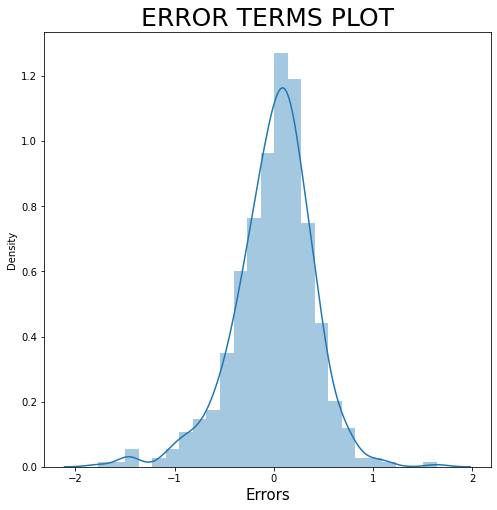

In [53]:
plt.figure(figsize= (8,8))
sn.distplot(y_train- y_train_predicted, bins=25)
plt.title('ERROR TERMS PLOT', fontsize= 25)
plt.xlabel('Errors', fontsize= 15)
plt.show()

We can cleary see tat the error term's mean is centered around 0 and plot is looking like a normal distribution. This gives a bit more power to the model we created in last step as it does not seem to violate any of the assumptions for linear regression

## MODEL PREDICTIONS

In [54]:
bikes_test.shape

(183, 29)

In [55]:
## Scaling Test Dataset 

bikes_test[['temp', 'humidity', 'windSpeed','count']]= Scaler.transform(bikes_test[['temp', 'humidity', 'windSpeed','count']])
bikes_test.describe()

,holiday,workingDay,temp,humidity,windSpeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weather_Mist/Cloudy,weather_clear,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.016393,0.693989,0.065163,-0.065722,-0.110284,0.025405,0.234973,0.229508,0.240437,0.519126,...,0.081967,0.109290,0.344262,0.612022,0.114754,0.163934,0.125683,0.153005,0.163934,0.114754
std,0.127331,0.462099,1.052473,0.994761,0.893956,1.009050,0.425145,0.421670,0.428521,0.501005,...,0.275067,0.312858,0.476431,0.488626,0.319599,0.371232,0.332401,0.360980,0.371232,0.319599
min,0.000000,0.000000,-2.193259,-2.300466,-1.755098,-2.316163,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.858996,-0.862991,-0.753893,-0.666164,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.109954,-0.067244,-0.257088,0.046230,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.968168,0.603786,0.431571,0.808326,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.043243,2.403445,2.700820,2.018774,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
y_test= bikes_test.pop('count')
X_test= bikes_test.copy()
print(y_test.shape)
print(X_test.shape)

(183,)
(183, 28)


In [60]:
# Performing Same preprocessing as Train dataset
X_test= X_test[X_train_1.columns]
X_test.head()
X_test_c= sm.add_constant(X_test)
X_test_c.describe()

,const,holiday,temp,humidity,windSpeed,season_spring,season_summer,season_winter,year_2019,month_Sep,weather_Mist/Cloudy,weather_clear
count,183.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.0,0.016393,0.065163,-0.065722,-0.110284,0.234973,0.229508,0.240437,0.519126,0.109290,0.344262,0.612022
std,0.0,0.127331,1.052473,0.994761,0.893956,0.425145,0.421670,0.428521,0.501005,0.312858,0.476431,0.488626
min,1.0,0.000000,-2.193259,-2.300466,-1.755098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,-0.858996,-0.862991,-0.753893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.109954,-0.067244,-0.257088,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.0,0.000000,0.968168,0.603786,0.431571,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,1.000000,2.043243,2.403445,2.700820,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_test_predicted= lrm.predict(X_test_c)
y_test_predicted.head()

instant
262   -0.205823
279    0.047063
725   -1.730964
459    1.060122
247    0.362846
dtype: float64

## MODEL EVALUATIONS

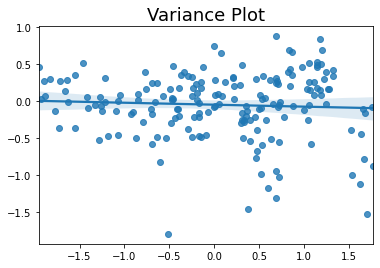

In [79]:
sn.regplot(y_test_predicted, y_test- y_test_predicted)
plt.title('Variance Plot',fontsize= 18)
plt.show()

## we can clearly see no visible pattern and the variance in the error terms is also pretty similar for all data points.

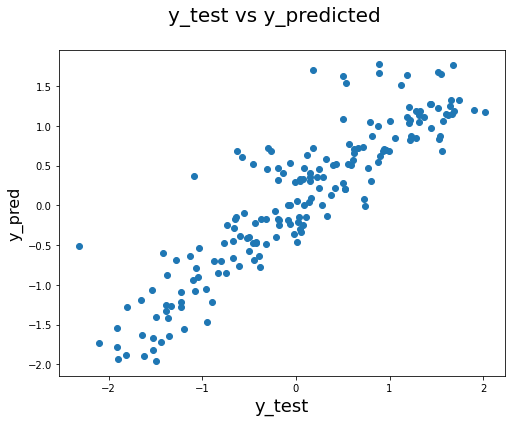

In [62]:
fig = plt.figure(figsize= (8,6))
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

Model is looking to follow a linear relationship. Let'check R2 score value for the model

In [63]:
r2_train= r2_score(y_train, y_train_predicted)
print('r2 Score for Training Set: ',round(r2_train,2))
mse_test= np.sqrt(mean_squared_error(y_train, y_train_predicted))
print('Mean Squared Error for Traning Set: ',round(mse_test,2))
ntr= X_train_1.shape[0]
ftr= X_train_1.shape[1]
Adtr= 1-(((1-r2_train)*(ntr-1))/(ntr-ftr-1))
print('Adjusted RSquared for Traning Set: ',round(Adtr,2))


print()

r2_test= r2_score(y_test, y_test_predicted)
print('r2 Score for test set: ',round(r2_test,2))
mse_test= np.sqrt(mean_squared_error(y_test, y_test_predicted))
print('Mean Squared Error for Test Set: ',round(mse_test,2))

nts= X_test.shape[0]
fts= X_test.shape[1]
Adts= 1-(((1-r2_test)*(nts-1))/(nts-fts-1))
print('Adjusted RSquared for Test Set: ',round(Adts,2))

r2 Score for Training Set:  0.84
Mean Squared Error for Traning Set:  0.4
Adjusted RSquared for Traning Set:  0.84

r2 Score for test set:  0.8
Mean Squared Error for Test Set:  0.45
Adjusted RSquared for Test Set:  0.79


## INFERENCES

1. r2 score for test and train set are almost equal which means on average our Linear Regression model is explaining 82% of the variance of Bikes dataset

2. F-Statistics for the model is high and it's associated probalility is almost 0, hence we can infer the model we built is significant.

3. Although we should think of other non linear models as well to reduce these error terms and a better fit for the data as we have differences in Adjusted R-Squared of test and train data.

4. Mean Squared Error is also low for both test and train dataset, thus proving the underlying assumptions of Linear Regression

4. Also we can see multicollinearity between te chosen features , hence it would be benefecial to look into other models as well like time series which explains data better than Linear Regression.

In [70]:
print(round(lrm.params,2))

const                 -1.45
holiday               -0.37
temp                   0.55
humidity              -0.13
windSpeed             -0.12
season_spring         -0.18
season_summer          0.32
season_winter          0.55
year_2019              1.02
month_Sep              0.44
weather_Mist/Cloudy    0.62
weather_clear          0.84
dtype: float64


-1.44721127601654

## CONCLUSIONS:

#### Linear equation for Dependent variable comes out to be - 
##### count= -1.45 - holiday*0.37 + temp*0.55 - humidity*0.13 - windSpeed*0.12 - season_Spring*0.18 + season_Summer*0.32 + season_winter*0.55 + year_2019*1.02 + month_Sep*0.44 + weather_Mist/cloudy*0.62 + weather_clear*0.84
    
 
#### From the above equation features like  Temp, year 2019, Winter Season,  Weather type- Clear & Mist/Cloudy have the highest impact on bike rentals. Hence strategies for increement in rentals should be made keeping these factors in mind. Below are the important ones:
      1. Temp
      2. year_2019
      3. Winter Season
      4. Clear Weather
      5. Mist/Cloudy Weather 


####  Month of September , Summers and Holidays have medium impact on number of rentals.

#### Similarly Humidity, Windspeed and Spring seasonhave the least impact and should not be given priority for changing the norms.